# Data 102 Final Project: Trends in Transportation Surrounding the COVID-19 Pandemic

Install External Libraries

Note: You may need to restart the kernel after installing external packages.

In [1]:
!conda install mkl-service -y

Solving environment: done

# All requested packages already installed.



In [2]:
!pip install pymc3==3.11

In [3]:
!pip install arviz==0.11.0

In [4]:
pip install pycausalimpact

Note: you may need to restart the kernel to use updated packages.


In [5]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from datetime import datetime

import pymc3 as pm
from pymc3 import glm
import statsmodels.api as sm
from sklearn import preprocessing
import arviz

In [6]:
#For research question #2
from sklearn.preprocessing import MinMaxScaler
from causalimpact import CausalImpact

In [7]:
sns.set(rc={'figure.figsize':(15 ,12)})

In [8]:
transportation = pd.read_csv('Monthly_Transportation_Statistics.csv')
transportation.tail(20)

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
872,872,09/01/2019 12:00:00 AM,30.0,NaN,NaN,77930000.0,9650000.0,68280000.0,18254603.0,396133294.0,...,563000.0,77930000.0,12499000.0,9650000.0,4588000.0,68280000.0,1.014349e+11,5.014872e+10,0.8,5.128617e+10
873,873,10/01/2019 12:00:00 AM,51.0,1.12,9155.0,77630000.0,9710000.0,67920000.0,19042339.0,426409210.0,...,518000.0,77630000.0,12339000.0,9710000.0,4427000.0,67920000.0,1.071120e+11,5.335177e+10,0.8,5.376023e+10
874,874,11/01/2019 12:00:00 AM,29.0,NaN,NaN,79000000.0,9760000.0,69240000.0,16305051.0,371769420.0,...,465000.0,79000000.0,12573000.0,9760000.0,4409000.0,69240000.0,9.903155e+10,5.010448e+10,0.8,4.892707e+10
875,875,12/01/2019 12:00:00 AM,14.0,NaN,NaN,78790000.0,9720000.0,69070000.0,16214779.0,352170175.0,...,475000.0,78790000.0,12346000.0,9720000.0,4477000.0,69070000.0,9.634248e+10,4.668673e+10,0.8,4.965575e+10
876,876,01/01/2020 12:00:00 AM,28.0,1.11,7860.0,79880000.0,9790000.0,70090000.0,16638744.0,375850377.0,...,446000.0,79880000.0,12509000.0,9790000.0,4364000.0,70090000.0,9.709232e+10,4.916571e+10,0.8,4.792660e+10
877,877,02/01/2020 12:00:00 AM,22.0,NaN,NaN,78640000.0,9200000.0,69430000.0,15882892.0,365323288.0,...,448000.0,78640000.0,12508000.0,9200000.0,4269000.0,69430000.0,9.594929e+10,4.845558e+10,0.8,4.749372e+10
878,878,03/01/2020 12:00:00 AM,17.0,NaN,NaN,37660000.0,4520000.0,33140000.0,10718676.0,260349525.0,...,390000.0,37660000.0,8458000.0,4520000.0,2902000.0,33140000.0,9.881026e+10,5.015464e+10,0.7,4.865562e+10
879,879,04/01/2020 12:00:00 AM,14.0,1.45,9070.0,2990000.0,130000.0,2860000.0,4302137.0,110750438.0,...,341000.0,2990000.0,6747000.0,130000.0,1974000.0,2860000.0,5.812297e+10,2.835669e+10,0.6,2.976629e+10
880,880,05/01/2020 12:00:00 AM,22.0,NaN,NaN,8010000.0,180000.0,7830000.0,5466452.0,130771756.0,...,299000.0,8010000.0,9439000.0,180000.0,2675000.0,7830000.0,5.606894e+10,2.536716e+10,0.9,3.070178e+10
881,881,06/01/2020 12:00:00 AM,29.0,NaN,NaN,15350000.0,350000.0,15000000.0,7085679.0,160704344.0,...,337000.0,15350000.0,10131000.0,350000.0,2892000.0,15000000.0,8.205149e+10,4.159115e+10,0.9,4.046034e+10


# EDA

In [9]:
#Here we listed all features from the transportation dataset. Commented out to reduce clutter

#list(transportation)

In [10]:
#We selected certain features that we thought would be interesting to explore further
final_features = transportation
final_features = final_features[["Date",
       "Auto sales",
       'Auto sales SAAR (millions)', 
       'Highway Vehicle Miles Traveled - All Systems',
       'Unemployment Rate - Seasonally Adjusted', 
       'State and Local Government Construction Spending - Highway and Street', 
       'State and Local Government Construction Spending - Commercial', 
       'State and Local Government Construction Spending - Air Passenger Terminal',
       'Real Gross Domestic Product - Seasonally Adjusted',
       'Unemployed - Seasonally Adjusted',
       'Labor Force Participation Rate - Seasonally Adjusted',
       'Highway Fuel Price - Regular Gasoline',
       ]]
final_features["Date"] = pd.to_datetime(final_features["Date"])
final_features = final_features[final_features["Date"] >= '04-01-2020']
final_features

<ipython-input-10-6855d2960406>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_features["Date"] = pd.to_datetime(final_features["Date"])


,Date,Auto sales,Auto sales SAAR (millions),Highway Vehicle Miles Traveled - All Systems,Unemployment Rate - Seasonally Adjusted,State and Local Government Construction Spending - Highway and Street,State and Local Government Construction Spending - Commercial,State and Local Government Construction Spending - Air Passenger Terminal,Real Gross Domestic Product - Seasonally Adjusted,Unemployed - Seasonally Adjusted,Labor Force Participation Rate - Seasonally Adjusted,Highway Fuel Price - Regular Gasoline
879,2020-04-01,166400.0,1974000.0,1.659520e+11,0.148,7.147000e+09,221000000.0,1.024000e+09,1.730251e+13,23109000.0,0.602,1.841
880,2020-05-01,258500.0,2675000.0,2.127840e+11,0.133,8.945000e+09,225000000.0,1.057000e+09,NaN,20975000.0,0.608,1.870
881,2020-06-01,251200.0,2892000.0,2.473350e+11,0.111,1.038700e+10,211000000.0,1.094000e+09,NaN,17697000.0,0.614,2.082
882,2020-07-01,292600.0,3469000.0,2.601250e+11,0.102,1.083700e+10,228000000.0,1.071000e+09,1.859652e+13,16308000.0,0.615,2.183
883,2020-08-01,299800.0,3477000.0,2.527910e+11,0.084,1.060400e+10,225000000.0,1.110000e+09,NaN,13542000.0,0.617,2.182
884,2020-09-01,304800.0,3744000.0,2.472080e+11,0.078,1.038000e+10,231000000.0,1.085000e+09,NaN,12535000.0,0.614,2.183
885,2020-10-01,313600.0,3859000.0,2.590590e+11,0.069,1.005300e+10,236000000.0,1.092000e+09,1.879443e+13,11049000.0,0.616,2.158
886,2020-11-01,277600.0,3778000.0,2.335770e+11,0.067,8.195000e+09,228000000.0,1.013000e+09,NaN,10728000.0,0.615,2.108
887,2020-12-01,332900.0,3633000.0,2.440990e+11,0.067,5.931000e+09,203000000.0,9.120000e+08,NaN,10736000.0,0.615,2.195
888,2021-01-01,246300.0,3752000.0,2.232800e+11,0.063,4.654000e+09,173000000.0,8.230000e+08,1.908757e+13,10130000.0,0.614,2.334


In [11]:
final_features['Auto_SAAR_exp'] = np.exp(final_features['Auto sales SAAR (millions)'])

/opt/conda/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
final_features

,Date,Auto sales,Auto sales SAAR (millions),Highway Vehicle Miles Traveled - All Systems,Unemployment Rate - Seasonally Adjusted,State and Local Government Construction Spending - Highway and Street,State and Local Government Construction Spending - Commercial,State and Local Government Construction Spending - Air Passenger Terminal,Real Gross Domestic Product - Seasonally Adjusted,Unemployed - Seasonally Adjusted,Labor Force Participation Rate - Seasonally Adjusted,Highway Fuel Price - Regular Gasoline,Auto_SAAR_exp
879,2020-04-01,166400.0,1974000.0,1.659520e+11,0.148,7.147000e+09,221000000.0,1.024000e+09,1.730251e+13,23109000.0,0.602,1.841,inf
880,2020-05-01,258500.0,2675000.0,2.127840e+11,0.133,8.945000e+09,225000000.0,1.057000e+09,NaN,20975000.0,0.608,1.870,inf
881,2020-06-01,251200.0,2892000.0,2.473350e+11,0.111,1.038700e+10,211000000.0,1.094000e+09,NaN,17697000.0,0.614,2.082,inf
882,2020-07-01,292600.0,3469000.0,2.601250e+11,0.102,1.083700e+10,228000000.0,1.071000e+09,1.859652e+13,16308000.0,0.615,2.183,inf
883,2020-08-01,299800.0,3477000.0,2.527910e+11,0.084,1.060400e+10,225000000.0,1.110000e+09,NaN,13542000.0,0.617,2.182,inf
884,2020-09-01,304800.0,3744000.0,2.472080e+11,0.078,1.038000e+10,231000000.0,1.085000e+09,NaN,12535000.0,0.614,2.183,inf
885,2020-10-01,313600.0,3859000.0,2.590590e+11,0.069,1.005300e+10,236000000.0,1.092000e+09,1.879443e+13,11049000.0,0.616,2.158,inf
886,2020-11-01,277600.0,3778000.0,2.335770e+11,0.067,8.195000e+09,228000000.0,1.013000e+09,NaN,10728000.0,0.615,2.108,inf
887,2020-12-01,332900.0,3633000.0,2.440990e+11,0.067,5.931000e+09,203000000.0,9.120000e+08,NaN,10736000.0,0.615,2.195,inf
888,2021-01-01,246300.0,3752000.0,2.232800e+11,0.063,4.654000e+09,173000000.0,8.230000e+08,1.908757e+13,10130000.0,0.614,2.334,inf


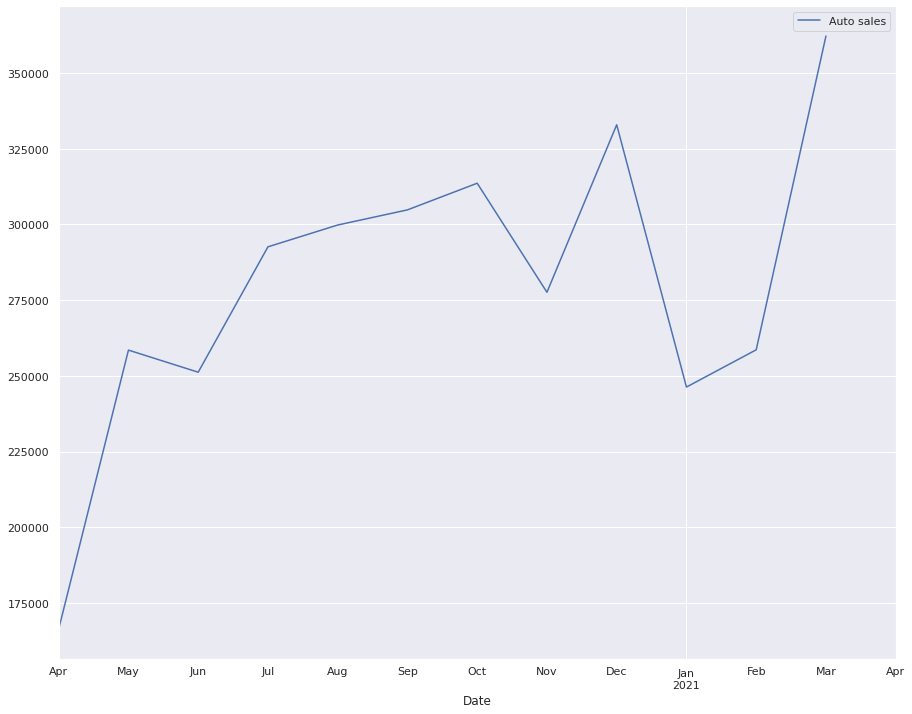

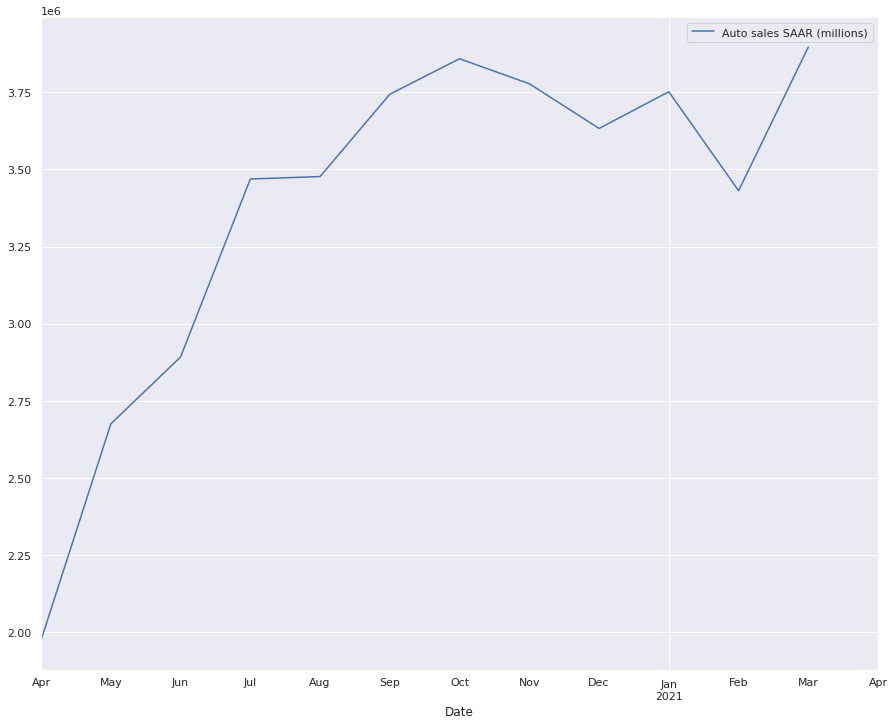

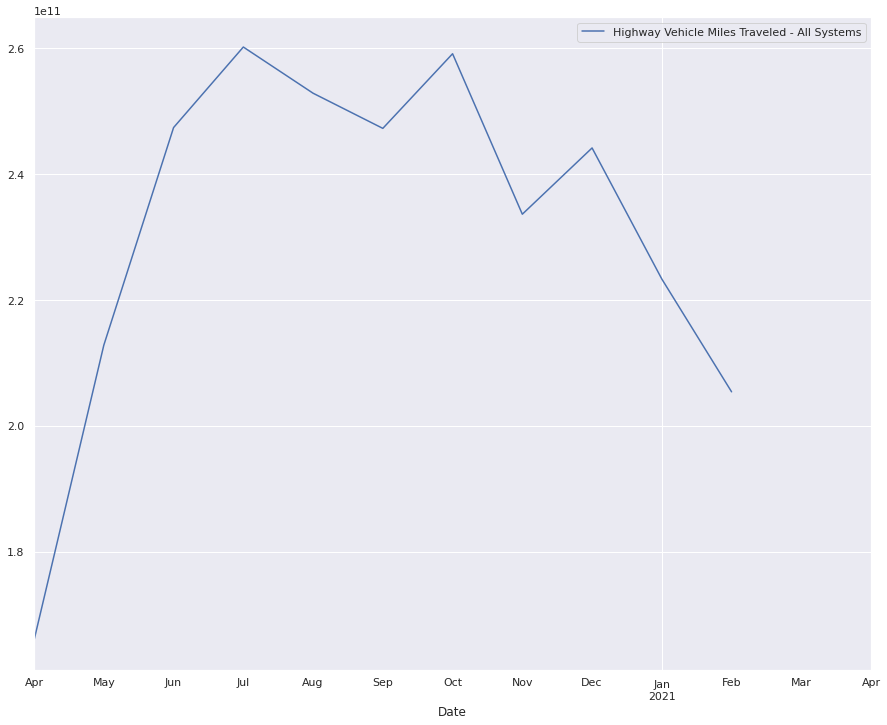

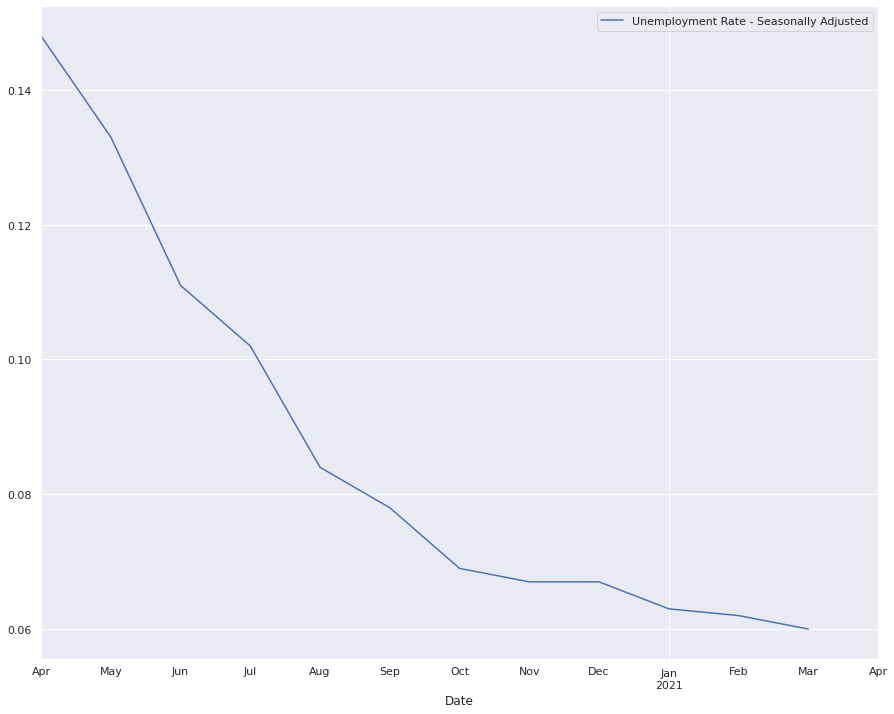

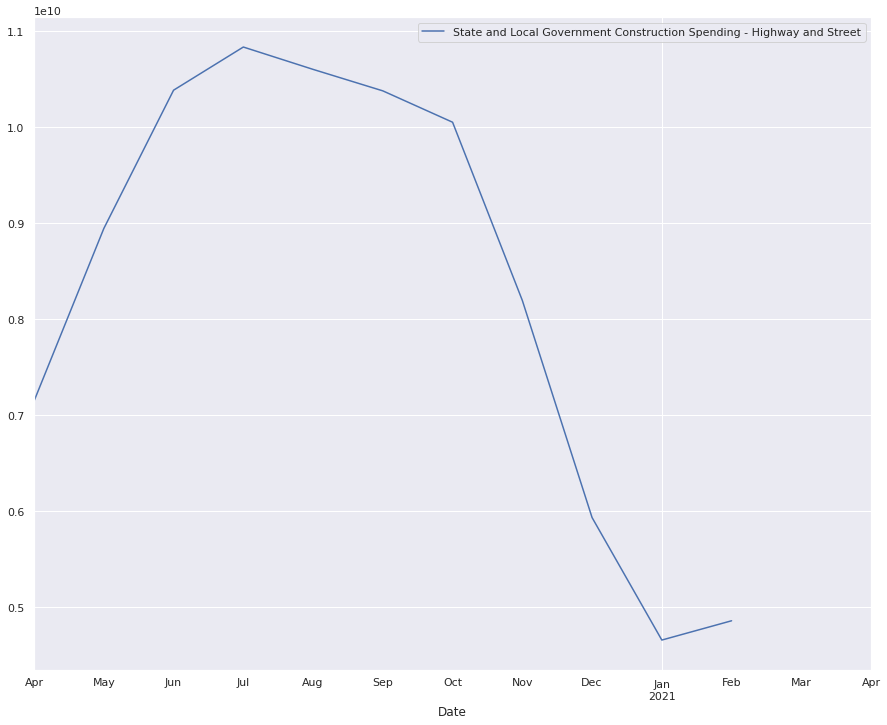

In [13]:
final_features.plot(x = "Date", y = "Auto sales")
final_features.plot(x = "Date", y = "Auto sales SAAR (millions)")
#final_features.plot(x = "Date", y = 'Auto_SAAR_Log')
final_features.plot(x = "Date", y = "Highway Vehicle Miles Traveled - All Systems")
final_features.plot(x = "Date", y = 'Unemployment Rate - Seasonally Adjusted')
final_features.plot(x = "Date", y = 'State and Local Government Construction Spending - Highway and Street');

In [14]:
transportation['Date'] = pd.to_datetime(transportation['Date'])

In [15]:
corr = transportation.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1 = c1.sort_values(ascending = False)

In [16]:
pd.set_option('display.max_rows', 500)

In [17]:
c1[c1.index.get_level_values(1).str.contains('Auto')]

Auto sales                                                                                   Auto sales                                                       1.000000
Auto sales SAAR (millions)                                                                   Auto sales SAAR (millions)                                       1.000000
State and Local Government Construction Spending - Automotive                                State and Local Government Construction Spending - Automotive    1.000000
State and Local Government Construction Spending - Parking                                   State and Local Government Construction Spending - Automotive    0.955955
Auto sales SAAR (millions)                                                                   Auto sales                                                       0.900895
Auto sales                                                                                   Auto sales SAAR (millions)                                       0.90089

# Research Question 1: GLM

In [18]:
#import posterior predictive plotting function as outlined in GLM lecture
#Edited to conform to what we are plotting
def show_posterior_predictive_edited(
    trace, x, y, num_lines=100,
    title="", 
    sample_y_axis = 'months'
):
    """
    Makes a posterior predictive plot for auto sales data, 
    showing possible lines in gray
    """
    
    #removed np.exp call on output of lambda function
    converter = lambda x, sample: sample['Intercept'] + sample[sample_y_axis] *  x
    plt.figure(figsize=(6, 4), dpi=100)
    plt.plot(x, y, marker='o', linestyle='', label='Observed')
    plt.xlabel(f'Months starting in April')
    plt.ylabel('Auto Sales')
    pm.plot_posterior_predictive_glm(
        trace, samples=num_lines, eval=np.arange(-3, 15), 
        lm=converter, label='Predicted', alpha=0.4
    )
    plt.title(title)
    plt.legend()

def show_posterior_predictive(
    trace, x, y, num_lines=100,
    title=""
):
    """
    Makes a posterior predictive plot for turbine data, 
    showing possible lines in gray
    """
    
    converter = lambda x, sample: np.exp(sample['Intercept'] + sample['year'] *  x)
    plt.figure(figsize=(6, 4), dpi=100)
    plt.semilogy(x, y, marker='o', linestyle='', label='Observed')
    plt.xlabel(f'Years since 2000')
    plt.ylabel('Number of turbines')
    pm.plot_posterior_predictive_glm(
        trace, samples=num_lines, eval=np.arange(-3, 25), 
        lm=converter, label='Predicted', alpha=0.4
    )
    plt.title(title)
    plt.legend()

In [19]:
# Create table of auto sales since the April 2020 COVID dip
auto_sales = final_features[["Date", 'Auto sales']]
auto_sales = auto_sales.dropna()
auto_sales["months"] = np.arange(1, len(auto_sales["Date"]) + 1)
auto_sales['sales_thousands'] = auto_sales['Auto sales'] / 1000

In [20]:
auto_sales

,Date,Auto sales,months,sales_thousands
879,2020-04-01,166400.0,1,166.4
880,2020-05-01,258500.0,2,258.5
881,2020-06-01,251200.0,3,251.2
882,2020-07-01,292600.0,4,292.6
883,2020-08-01,299800.0,5,299.8
884,2020-09-01,304800.0,6,304.8
885,2020-10-01,313600.0,7,313.6
886,2020-11-01,277600.0,8,277.6
887,2020-12-01,332900.0,9,332.9
888,2021-01-01,246300.0,10,246.3


In [21]:
#Convert auto sales to an iterative total
auto_sales['sales_total'] = np.cumsum(auto_sales['sales_thousands'])

<AxesSubplot:xlabel='months'>

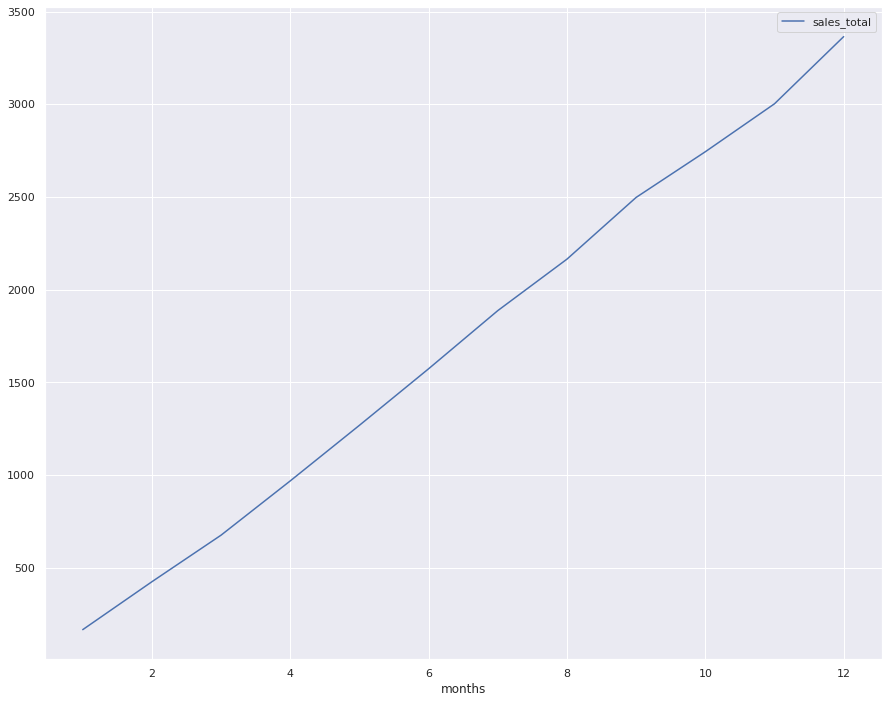

In [22]:
auto_sales.plot(x = "months", y = "sales_total")

In [23]:
#The cumulative trend in auto sales is clearly linear, so we use a Bayesian model with Gaussian likelihood.
with pm.Model() as gaussian_model:
    glm.GLM.from_formula('sales_total ~ months', auto_sales)
    # draw posterior samples using NUTS sampling
    gaussian_trace = pm.sample(1000, cores=2, target_accept=0.95)

/opt/conda/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, months, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.


/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'months'}>,
        <AxesSubplot:title={'center':'months'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

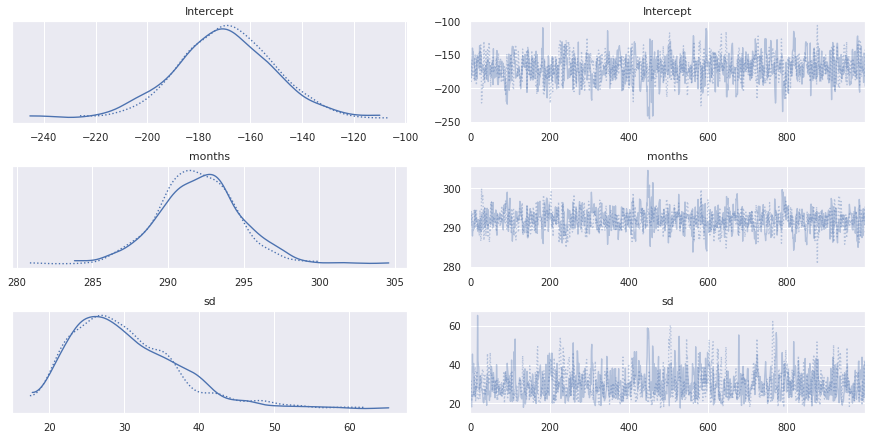

In [24]:
arviz.plot_trace(gaussian_trace)

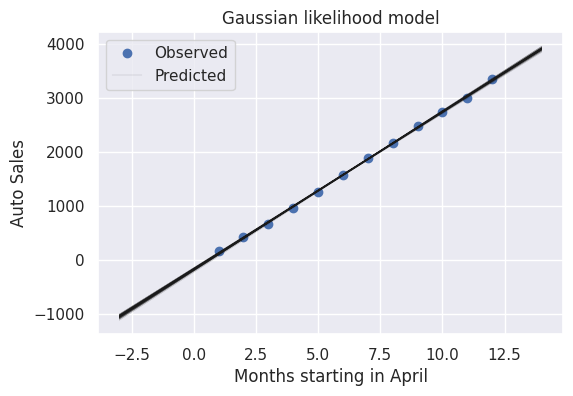

In [25]:
show_posterior_predictive_edited(gaussian_trace, x=auto_sales['months'], y=auto_sales['sales_total'], title="Gaussian likelihood model")

<AxesSubplot:xlabel='months_log'>

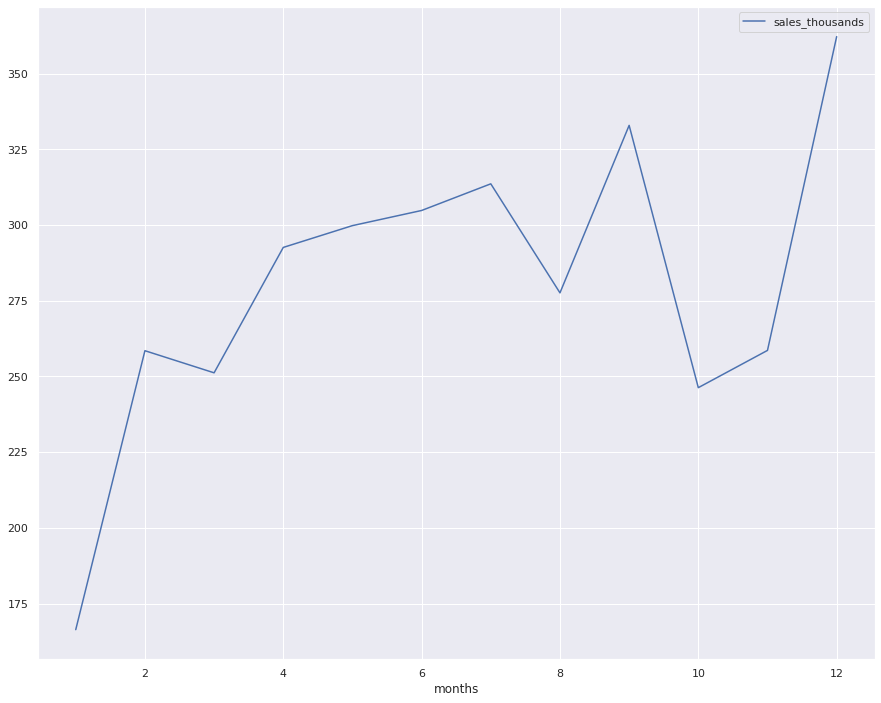

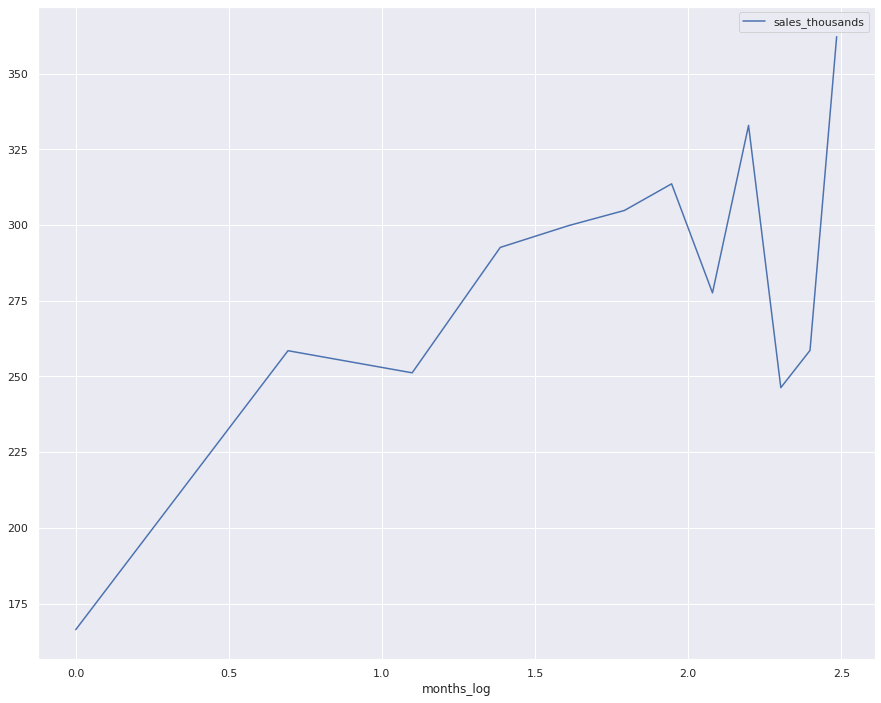

In [26]:
auto_sales['months_log'] = np.log(auto_sales['months'])
auto_sales.plot(x = "months", y = "sales_thousands")
auto_sales.plot(x = "months_log", y = "sales_thousands")

In [27]:
with pm.Model() as gaussian_model:
    glm.GLM.from_formula('sales_thousands ~ months_log', auto_sales)
    # draw posterior samples using NUTS sampling
    gaussian_trace = pm.sample(1000, cores=2, target_accept=0.95)

/opt/conda/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, months_log, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 8 seconds.


/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'months_log'}>,
        <AxesSubplot:title={'center':'months_log'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

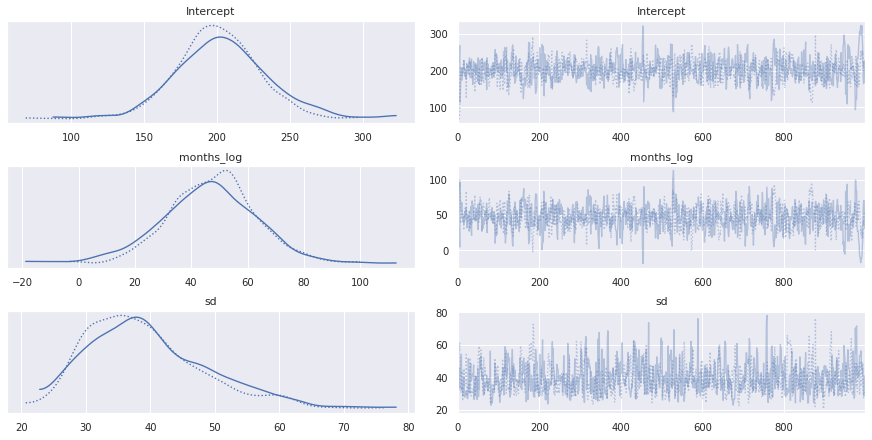

In [28]:
arviz.plot_trace(gaussian_trace)

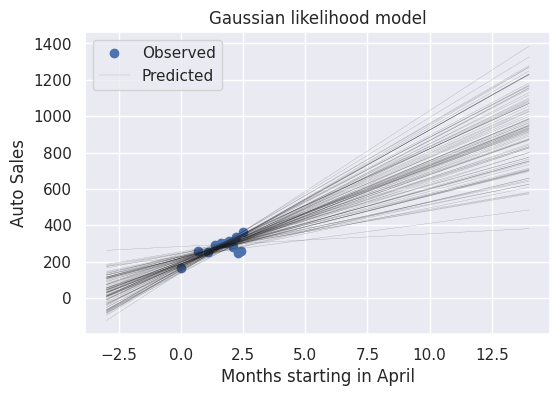

In [29]:
show_posterior_predictive_edited(gaussian_trace, x=auto_sales['months_log'], y=auto_sales['sales_thousands'], title="Gaussian likelihood model", sample_y_axis='months_log')

# Nonparametric Method

# Research Question 2: Causal Impact Analysis

Our second research question is as follows: "How did the COVID Pandemic affect trends in auto sales, and can we determine a causal effect?" 
In this section, I will conduct a causal impact analysis using Google's CausalImpact external library. This library uses a Bayesian structural time-series model to compare pre-COVID trends in auto sales with post-COVID trends. This is explained in more detail in the project report.

**Overview:** I want to conduct a causal impact analysis on trends in auto sales. The following code will prepare the transportation dataset for such an analysis. The model requires an additional covariate to use as a control. The following code also identifies and extracts this additional trend for use in the model. Finally, I display the model's results.

In [30]:
#Select data only in the timeframe we are using for analysis. I decided to use time series data up to 4 years before the COVID pandemic started.
trans_causal = transportation.copy()
trans_causal["Date"] = pd.to_datetime(trans_causal["Date"])
trans_causal = trans_causal[trans_causal["Date"] >= '01-01-2016']

In [31]:
#Print out all pairs of features in transportation dataframe as well as their correlation.
corr = trans_causal.corr()
c2 = corr.abs().unstack()
c2 = c2.sort_values(ascending = False)
pd.set_option('display.max_rows', 500)
c2[c2.index.get_level_values(1).str.contains('Auto')]

Auto sales                                                                                   Auto sales                                                       1.000000
Auto sales SAAR (millions)                                                                   Auto sales SAAR (millions)                                       1.000000
State and Local Government Construction Spending - Automotive                                State and Local Government Construction Spending - Automotive    1.000000
National Highway Construction Cost Index (NHCCI)                                             State and Local Government Construction Spending - Automotive    0.967878
State and Local Government Construction Spending - Commercial                                State and Local Government Construction Spending - Automotive    0.951187
Index                                                                                        Auto sales SAAR (millions)                                       0.94716

In [32]:
trans_causal.set_index('Date', inplace=True)

In [33]:
#Normalize the values in transportation so they can be more easily compared.
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(trans_causal)
trans_norm = scaler.transform(trans_causal)
trans_norm = pd.DataFrame(trans_norm, index=trans_causal.index, columns=trans_causal.columns)
trans_norm

,Index,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,Transit Ridership - Urban Rail - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.000000,0.174603,0.139535,0.098142,NaN,NaN,NaN,0.678544,0.840705,0.807849,...,0.621212,NaN,0.509714,NaN,1.000000,NaN,0.481680,0.483741,NaN,0.478598
2016-02-01,0.015873,0.285714,NaN,NaN,NaN,NaN,NaN,0.706012,0.905116,0.844602,...,0.530303,NaN,0.509714,NaN,0.997124,NaN,0.511064,0.514226,NaN,0.504360
2016-03-01,0.031746,0.349206,NaN,NaN,NaN,NaN,NaN,0.832029,1.000000,0.946212,...,0.609848,NaN,0.458090,NaN,0.944008,NaN,0.628443,0.599599,NaN,0.651860
2016-04-01,0.047619,0.333333,0.255814,0.507259,NaN,NaN,NaN,0.807856,0.943910,0.903484,...,0.454545,NaN,0.512073,NaN,0.934803,NaN,0.626957,0.612433,NaN,0.632949
2016-05-01,0.063492,0.428571,NaN,NaN,NaN,NaN,NaN,0.840617,0.922622,0.941713,...,0.409091,NaN,0.507910,NaN,0.943432,NaN,0.617089,0.593198,NaN,0.635318
2016-06-01,0.079365,0.396825,NaN,NaN,NaN,NaN,NaN,0.884162,0.877762,0.945411,...,0.356061,NaN,0.524147,NaN,0.931160,NaN,0.668817,0.611775,NaN,0.723648
2016-07-01,0.095238,0.920635,0.418605,0.656794,NaN,NaN,NaN,0.873085,0.807684,0.857953,...,0.299242,NaN,0.562726,NaN,0.941707,NaN,0.505358,0.511391,NaN,0.495579
2016-08-01,0.111111,0.634921,NaN,NaN,NaN,NaN,NaN,0.950660,0.911623,0.906286,...,0.287879,NaN,0.550652,NaN,0.924640,NaN,0.677134,0.655887,NaN,0.687480
2016-09-01,0.126984,0.523810,NaN,NaN,NaN,NaN,NaN,0.842324,0.965358,0.916540,...,0.287879,NaN,0.543297,NaN,0.948802,NaN,0.640585,0.626898,NaN,0.644498


In [34]:
trans_spending = trans_norm.loc[:, trans_norm.columns.str.startswith('State')].iloc[:, 20:24]

<AxesSubplot:xlabel='Date'>

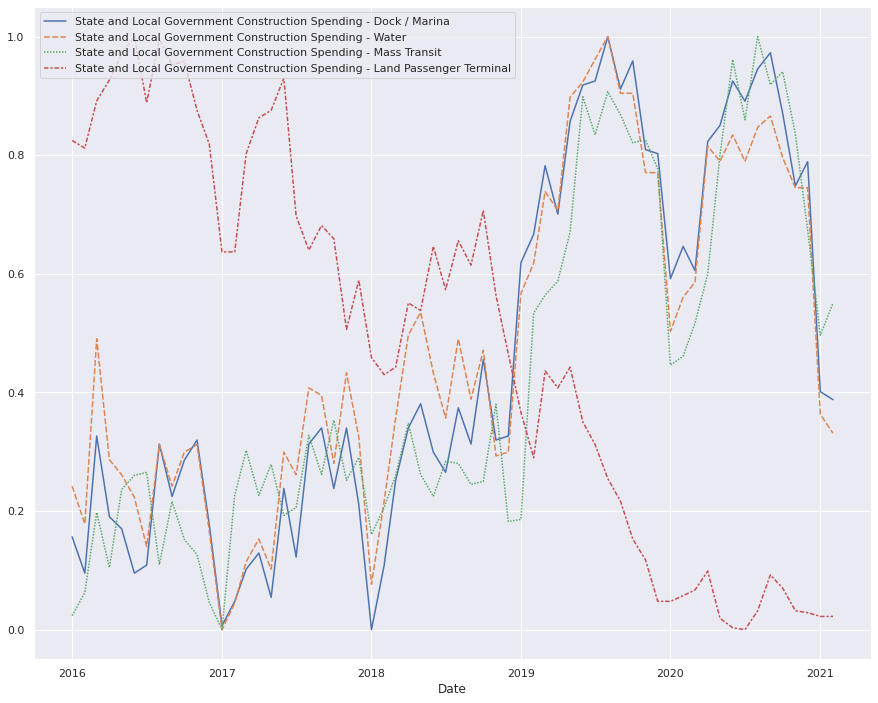

In [35]:
#Comparing with the correlations I printed above, I discovered a feature that appears to be correlated with auto sales but apparently unaffected by the COVID pandemic. (There is no dip)
sns.lineplot(data=trans_spending)

In [36]:
final_trans_causal = trans_causal[['Auto sales', 'State and Local Government Construction Spending - Land Passenger Terminal']]#SAAR (millions) 

Text(0.5, 1.0, 'Normalized Auto Sales Compared with Government Spending on Land Passenger Terminals')

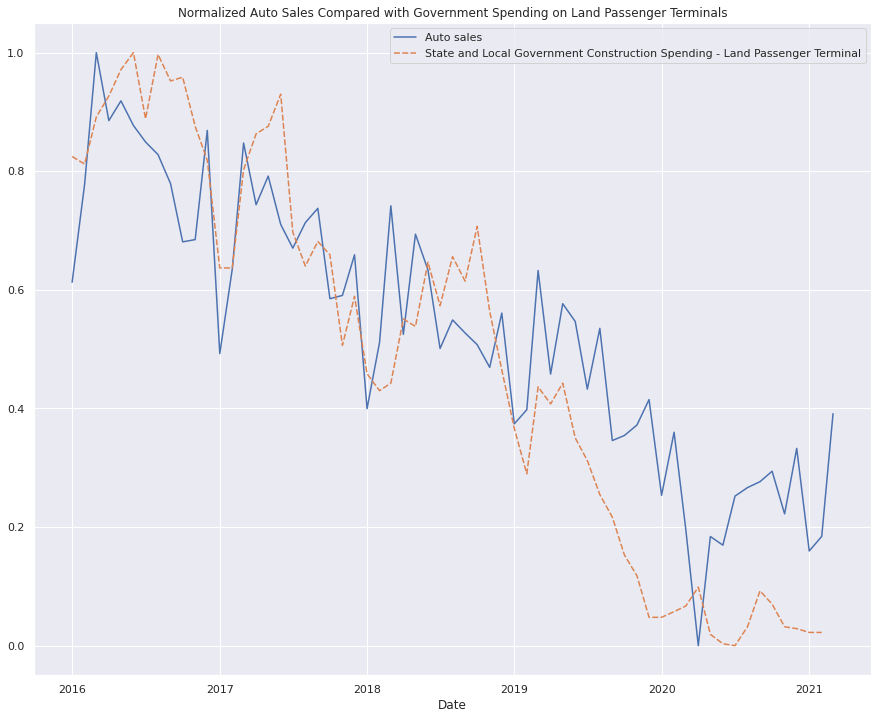

In [45]:
sns.lineplot(data=trans_norm[['Auto sales', 'State and Local Government Construction Spending - Land Passenger Terminal']]).set_title('Normalized Auto Sales Compared with Government Spending on Land Passenger Terminals')

In [38]:
#Set pre and post periods for the model.
pre_period = [1, 51]
post_period = [52, 62]
pre_period = ['2016-01-01', '2020-01-01']
post_period = ['2020-04-01', '2021-02-01']

In [39]:
final_trans_causal

,Auto sales,State and Local Government Construction Spending - Land Passenger Terminal
Date,,
2016-01-01,473100.0,348000000.0
2016-02-01,555900.0,344000000.0
2016-03-01,666900.0,369000000.0
2016-04-01,609500.0,380000000.0
2016-05-01,626200.0,394000000.0
2016-06-01,605400.0,403000000.0
2016-07-01,591500.0,368000000.0
2016-08-01,580800.0,402000000.0
2016-09-01,556300.0,388000000.0


In [40]:
#Values for April 4th 2021 are null so I drop them
#Rename columns to prepare them for modeling
final_trans_causal = final_trans_causal.dropna()
final_trans_causal.columns = ['y', 'x1']
final_trans_causal

,y,x1
Date,,
2016-01-01,473100.0,348000000.0
2016-02-01,555900.0,344000000.0
2016-03-01,666900.0,369000000.0
2016-04-01,609500.0,380000000.0
2016-05-01,626200.0,394000000.0
2016-06-01,605400.0,403000000.0
2016-07-01,591500.0,368000000.0
2016-08-01,580800.0,402000000.0
2016-09-01,556300.0,388000000.0


In [41]:
#Run CausalImpact model on data, predicting auto sales using Govt land terminal spending as a covariate.
ci = CausalImpact(final_trans_causal[['y', 'x1']], pre_period, post_period, prior_level_sd=None)

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Results will be interpeted and explained in the project report.

In [42]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    272936.36          3002300.0
Prediction (s.d.)         317638.41 (15150.46)3494022.46 (166655.05)
95% CI                    [287259.7, 346648.41][3159856.68, 3813132.46]

Absolute effect (s.d.)    -44702.04 (15150.46)-491722.46 (166655.05)
95% CI                    [-73712.04, -14323.33][-810832.46, -157556.68]

Relative effect (s.d.)    -14.07% (4.77%)    -14.07% (4.77%)
95% CI                    [-23.21%, -4.51%]  [-23.21%, -4.51%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.8%

For more details run the command: print(impact.summary('report'))


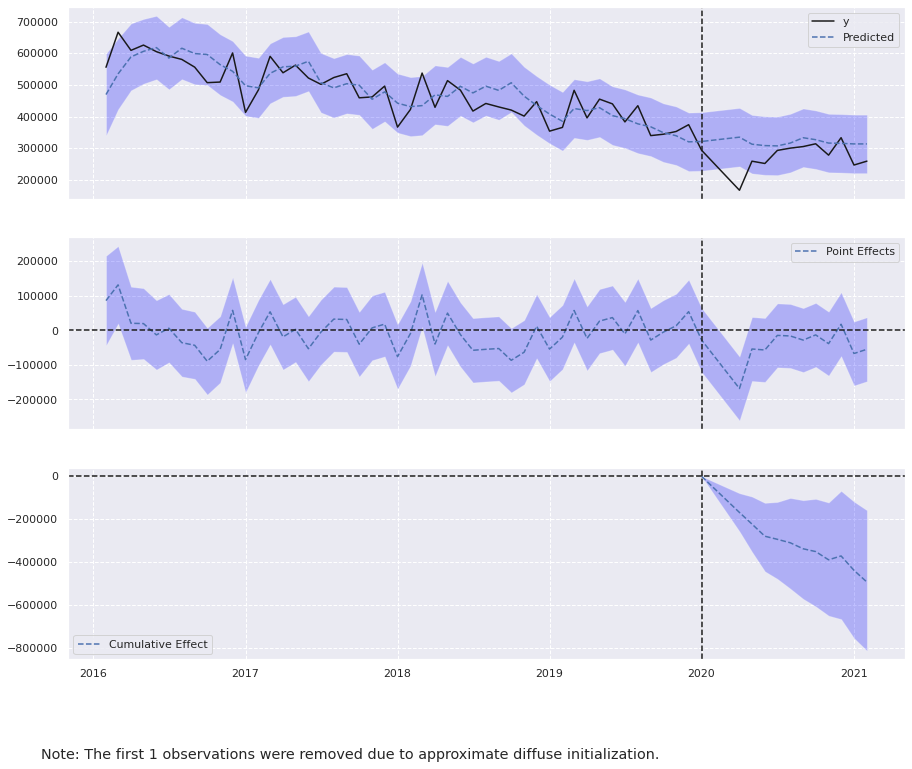

In [43]:
ci.plot()

In [44]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 272936.36. By contrast, in the absence of an
intervention, we would have expected an average response of 317638.41.
The 95% interval of this counterfactual prediction is [287259.7, 346648.41].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -44702.04 with a 95% interval of
[-73712.04, -14323.33]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3002300.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 3494022.46. The 95% interval of this prediction is [3159856.68, 3813132.46].


The above results are given in terms of absolute numbe